In [108]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [109]:
df = pd.read_csv('funda-amsterdam.csv')
dummies = pd.get_dummies(df['property_type'])
df_dummie = pd.concat([df,dummies], axis=1)
df_dummie.head()

,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built,apartment,house
0,0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,510000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,1,0
1,1,Moerdijkstraat 47 1,47,1,1079 XM,22-6-2016,215000,apartment,2,5-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938,1,0
2,2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,325000,apartment,3,8-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003,1,0
3,3,Brederodestraat 124 -1,58,2,1054 VH,14-5-2016,315000,apartment,3,2-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1910,1,0
4,4,Admiraal De Ruijterweg 409 III,63,1,1055 MD,14-6-2016,200000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,1,0


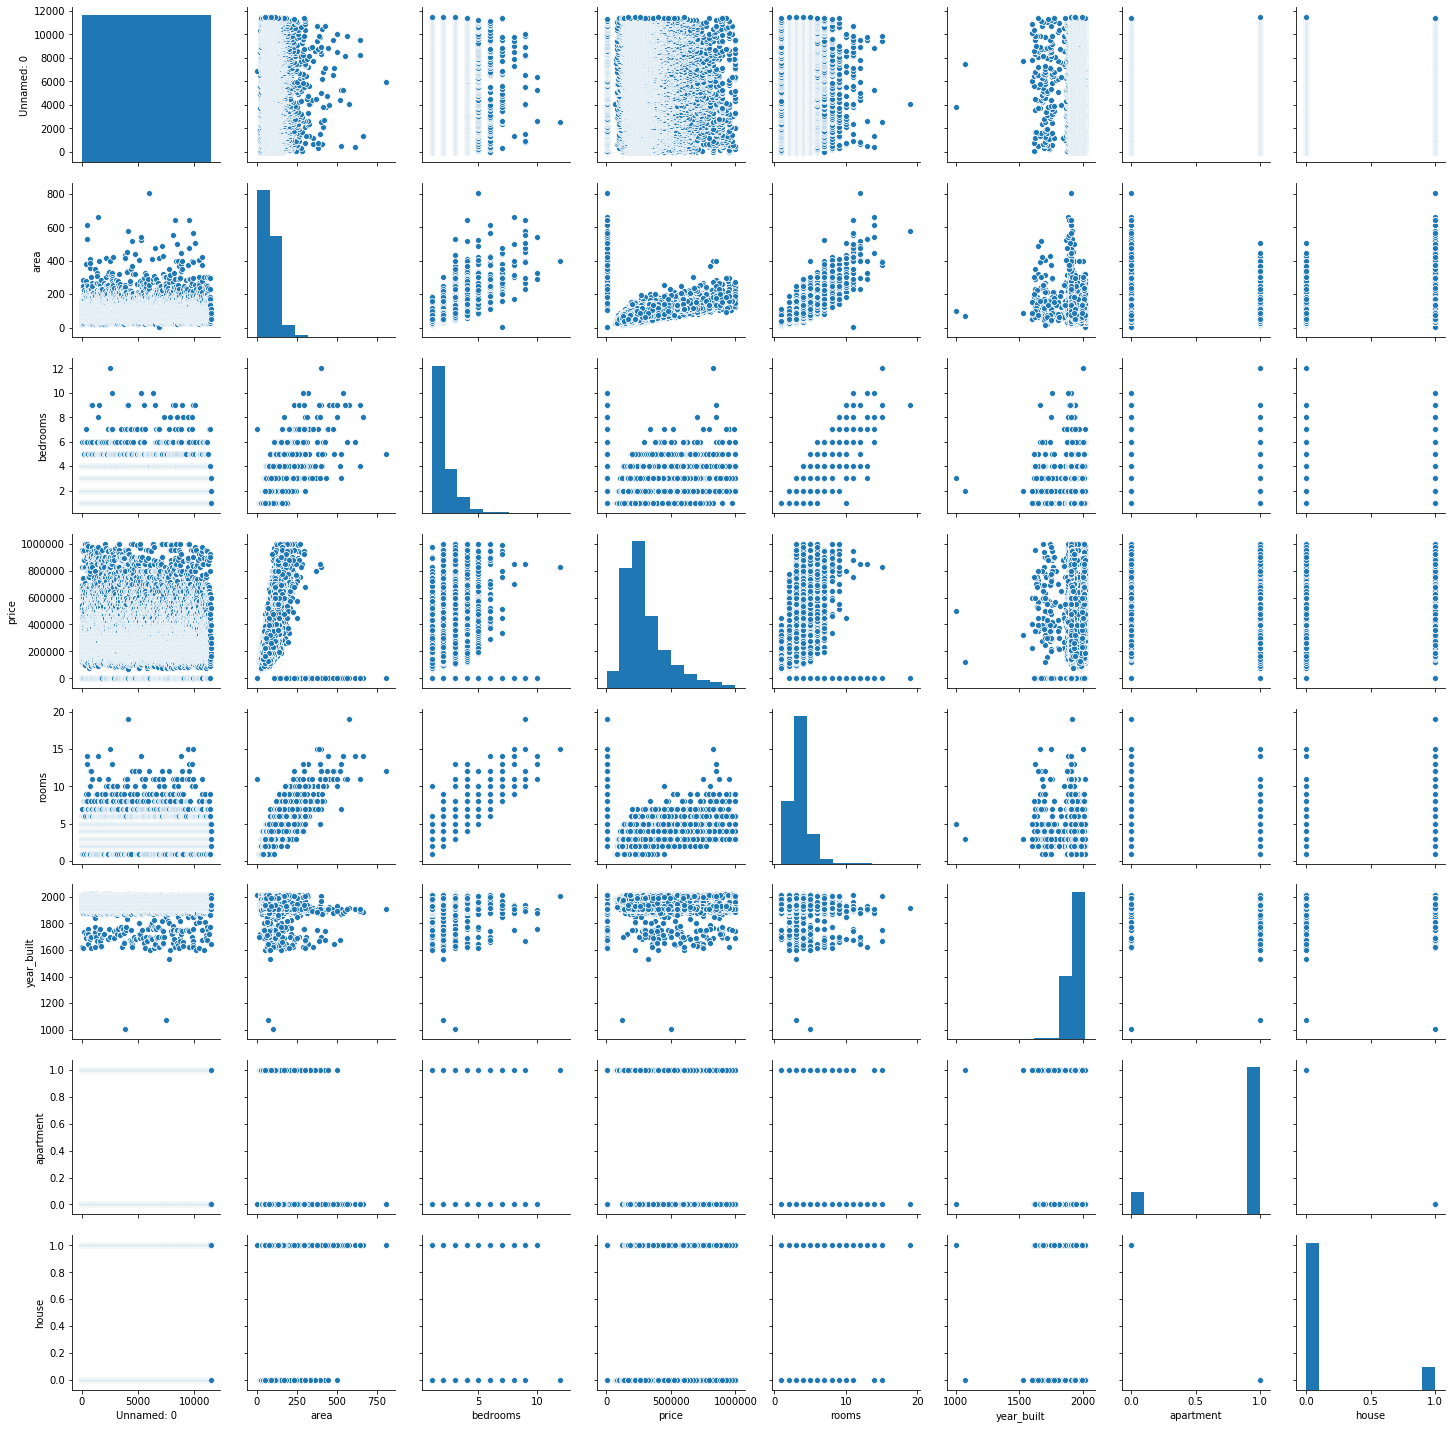

In [110]:
sns.pairplot(df_dummie)
plt.show()

In [111]:
df_subset = df_dummie[df_dummie["price"]>10000]
print(df_subset)

       Unnamed: 0                                address  area  bedrooms  \
0               0              Knollendamstraat 4 III/IV   108         2   
1               1                    Moerdijkstraat 47 1    47         1   
2               2                      Zeeburgerdijk 349   116         2   
3               3                 Brederodestraat 124 -1    58         2   
4               4         Admiraal De Ruijterweg 409 III    63         1   
5               5              Bertrand Russellstraat 46   125         2   
6               6           Admiraal De Ruijterweg 417 I    64         3   
7               7                  Deltastraat 10 -boven   155         3   
8               8            Ben van Meerendonkstraat 49    85         2   
9               9           Jacob van Lennepstraat 263 B    67         2   
10             10                   Spaarndammerdijk 581   100         3   
11             11          Van Reigersbergenstraat 47 II    43         1   
12          

In [112]:
df_subset = df_dummie[['price', 'year_built', 'area', 'apartment', 'house']]
df_subset.head()

,price,year_built,area,apartment,house
0,510000,1906,108,1,0
1,215000,1938,47,1,0
2,325000,2003,116,1,0
3,315000,1910,58,1,0
4,200000,1906,63,1,0


In [113]:
y = df_subset['price'] #We need to take out the rating as our Y-variable
X = df_subset.loc[:,'year_built':'house'] #this slices the dataframe to include all rows and the columns from "action" to "metascore"
#X.index = df_subset['address'] #this stores the movie names in the column names, so we don't lose track of them later
X.head()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables
X_train.head() #The train data

,year_built,area,apartment,house
1041,1906,138,1,0
5355,1931,57,1,0
1383,1968,104,1,0
7950,1981,71,1,0
4451,1932,88,1,0


In [114]:
lm = LinearRegression() #create the model
model = lm.fit(X_train, y_train) #train the model

In [115]:
coef = pd.DataFrame(X.columns.values, lm.coef_) #this creates a df with a column with the column names, and the coefficients of the model
coef

,0
-252.640219,year_built
1081.190019,area
9648.895148,apartment
-9648.895148,house


In [116]:
y_test_p = lm.predict(X_test) #Generate predictions for the test data. So we use X.test, not X.train
r2_score(y_test, y_test_p)

0.1329055555930736

In [117]:
math.sqrt(mean_squared_error(y_test, y_test_p))

170247.15485091603

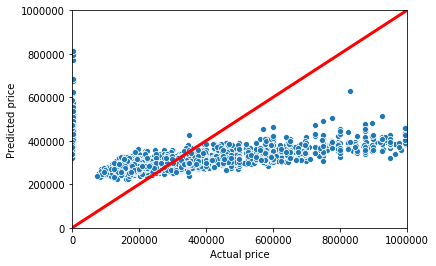

In [118]:
sns.scatterplot(y_test, y_test_p)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.xlim([0,1000000]) #Forcing the x- and y-axis to be the same length, so that we can compare 
plt.ylim([0,1000000])
plt.plot([0,1000000], [0,1000000], color='red', lw=3) #Plot a diagonal length
plt.show()